## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_one = "data/mouse_metadata.csv"
study_results_two = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata_one = pd.read_csv("data/mouse_metadata.csv")
study_results_two =  pd.read_csv("data/study_results.csv")


# Combine the data into a single dataset
combined_mouse_metadata = pd.merge(mouse_metadata_one, study_results_two, on="Mouse ID")

# Create Data Frame
df = pd.DataFrame(combined_mouse_metadata)
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Display the data table for preview
combined_mouse_metadata.df.head() 

AttributeError: 'DataFrame' object has no attribute 'df'

In [4]:
# Checking the number of mice.
unique_items = combined_mouse_metadata["Mouse ID"].nunique()
print(unique_items)

249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df[df.duplicated(subset=['Mouse ID','Timepoint'])]

#drop_duplicates(Timepoint=None, Mouse_ID='first', inplace=True)

# duplicate_id = combined_mouse_metadata_df.loc[[combined_mouse_metadata_df.duplicated(subset=['Mouse ID', 'Timepoint'],['Mouse ID']]).unique()

#duplicate_id = pd.merge[pd.merge.duplicate(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#Loc - Filter
# df.loc[<row condition> , <what columns you want to print>]
#Print the rows 911 till 913 with only the column MouseID till timepoint
# df.loc[911:913 ,"Drug Regimen":"Timepoint" ]
# df.loc[913 ,: ]
#Printing columns which are far off
# df.loc[: ,["Drug Regimen","Tumor Volume (mm3)"] ]
#Putting a condition on the rows - print female rows & all th columns
# df.loc[df['Sex']=='Male' , :]
# df.loc[df['Sex']!='Female' , :]
# df.loc[ df["Timepoint"] <10, :]
#Multiple conditions 
df.loc[ (df["Timepoint"] <10) & (df['Sex']=='Male'), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
40,g791,Ramicane,Male,11,16,0,45.000000,0
...,...,...,...,...,...,...,...,...
1799,x930,Naftisol,Male,13,26,5,46.078234,0
1846,y865,Ceftamin,Male,23,26,0,45.000000,0
1847,y865,Ceftamin,Male,23,26,5,46.735006,1
1883,z969,Naftisol,Male,9,30,0,45.000000,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.loc[df['Mouse ID']!='g989' , :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
#GroupBy - 2 types - Numerical column & Categorical columns
#Give me a statistic(mean,count,max,average,median) as PER category

#Average tumour volume aas PER sex
#Chaining multipl things - 

df.groupby(['Sex'])['Tumor Volume (mm3)'].agg([np.mean,np.max])

# Normal groupby
# df.groupby(['Sex'])['Tumor Volume (mm3)','Weight (g)'].mean()




,mean,amax
Sex,,
Female,51.100657,76.668817
Male,49.811764,78.567014


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_items = combined_mouse_metadata["Mouse ID"].nunique()
print(unique_items)

249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_mouse_metadata.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [10]:
df.groupby("Tumor Volume (mm3)").mean()

,Age_months,Weight (g),Timepoint,Metastatic Sites
Tumor Volume (mm3),,,,
22.050126,21.0,16.0,45.0,1.0
23.343598,3.0,17.0,45.0,1.0
24.365505,21.0,16.0,40.0,1.0
25.472143,3.0,17.0,40.0,1.0
26.546993,21.0,16.0,35.0,1.0
...,...,...,...,...
75.113288,2.0,25.0,45.0,2.0
75.123690,22.0,28.0,45.0,1.0
75.294936,8.0,28.0,45.0,4.0


In [18]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([np.mean])

,mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [52]:
Drug_Regimen_Mean = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

In [53]:
Drug_Regimen_Median = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

In [54]:
Drug_Regimen_Standard_Deviation = df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(np.std, ddof=0)

In [56]:
# Assemble the resulting series into a single summary dataframe.
pd.concat([Drug_Regimen_Mean, Drug_Regimen_Median, Drug_Regimen_Standard_Deviation], axis=1)

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,40.675741,41.557809,4.983904
Ceftamin,52.591172,51.776157,6.250556
Infubinol,52.884795,51.820584,6.548770
Ketapril,55.235638,53.698743,8.257659
Naftisol,54.331565,52.509285,8.112811
Placebo,54.033581,52.288934,7.799368
Propriva,52.322552,50.854632,6.487528
Ramicane,40.216745,40.673236,4.835669
Stelasyn,54.233149,52.431737,7.689090


## Bar and Pie Charts

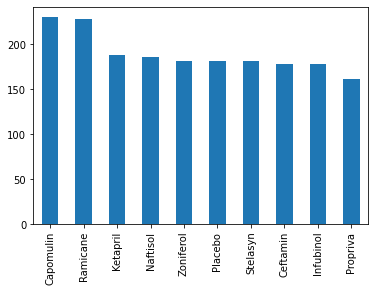

In [32]:
# Generate a bar plot showing the total number of measurements taken on/PER each drug regimen using pandas.
#Give me the count/Total number of measurements AS PER/on each category

Count_Drug_Regimen = df['Drug Regimen'].value_counts()

Count_Drug_Regimen.plot.bar()

plt.show()

<AxesSubplot:>

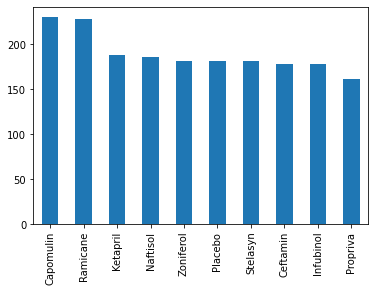

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Count_Drug_Regimen.plot.bar()



In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


mouse_sex=combined_mouse_metadata.groupby("Sex")["Mouse ID"].count().sort_values(Ascending=False)

plt.pie(mouse_sex, autopct="%1.1f%% ,labels=mouse_sex.index.values,\
textprops={"colors":"w"},colors=["b", "C6"], explode=(.05,0),shadow=True)
        
plt.ylabel("Sex").set_color("White") 
plt.savefig("Charts/Sex_%_In_Test_Subject.png")
         
plt.show()



SyntaxError: invalid syntax (<ipython-input-41-0b69afd1b948>, line 7)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs - ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged=tumor[["Mouse ID", "Timepoint"]].merge(Study_data_complete,on=["Mouse ID", Timepoint"], how="left")

In [ ]:
# Put treatments into a list for for (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merged[merged['Drug Regimen'] ==drug]['Tumor Volume (mm3)']
    iqr = tumor_data.quantile(.75) - tumor_data.quantile(.25)
    lower_bound = tumor_data.quantile(.25) - (1.5*iqr)
    upper_bound = tumor_data.quantile(.75) + (1.5*iqr)
    
    # add subset 
    tumor_ist.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    print(f'{drug} potential outliers: {tumor_data[(tumor_Data<lower_bound)|(tumor_data>upper_bound)]}')

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list)
plt.ylabel("Final Tumor Volume (mm3)")+
pkt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = np.arange(0, 10, 0.1)
times = []
for x in x_axis:
    times.append(x * x + np.random.randint(0, np.ceil(max(x_axis))))


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
